# Fine-tune accuracy evaluation

### Run this notebook under `PaddleOCR` directory!

In [1]:
import subprocess
import csv
from glob import glob

In [2]:
def label_reader(file_path):
    true_labels = {}
    
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            true_labels[row[0]] = row[1]
            
    return true_labels
                
true_labels = label_reader('train_data/groundtruth.csv')

In [3]:
img_path = 'train_data/val/'
total = len(glob(img_path + '*.png'))
total

146

In [4]:
# Specify your finetuned model path here!
# This repository provides a model: "../fine_tuned_rec_model/v3_en_mobile/best_accuracy"
finetuned_path="./output/v3_en_mobile/best_accuracy"

subprocess.run(["python3", "tools/infer_rec.py", 
                "-c", "configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml", 
                "-o", "Global.pretrained_model="+finetuned_path,
                "Global.infer_img="+img_path],
                stdout=subprocess.DEVNULL,
                stderr=subprocess.STDOUT)
    
num_correct = 0
incorrect_samples = []
with open('output/rec/predicts_ppocrv3_en.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split('\t')
        img_id = line[0].split('/')[-1]
        pred = "".join(ch.upper() for ch in line[1] if ch.isalnum())
        
        if true_labels[img_id] == pred:
            num_correct += 1
        else:
            incorrect_samples.append((line[0], pred))

print('The final accuracy is %.2f%%' % ((num_correct / total) * 100))

The final accuracy is 93.84%


## Identify fail cases

In [5]:
from numpy.random import randint
index = randint(0, len(incorrect_samples)-1)
actual = true_labels[incorrect_samples[index][0].split('/')[-1]]
incorrect_samples[index][0]

'train_data/val/nh1273.png'

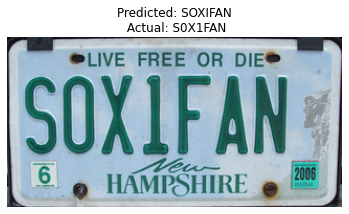

In [6]:
from matplotlib import pyplot as plt
plt.axis('off')
plt.title('Predicted: ' + incorrect_samples[index][1] + '\n Actual: ' + actual)
plt.imshow(plt.imread(incorrect_samples[index][0]))